<a href="https://colab.research.google.com/github/adolfolh/casuality-classification/blob/main/eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Run to download data
!wget https://github.com/adolfolh/casuality-classification/raw/main/data/casualties-2020.csv

In [ ]:
# Download libraries
!pip install -U kaleido

In [4]:
# Import libraries
import pandas as pd
import numpy as np
import kaleido
import plotly.express as px
import plotly.io as pio

# Change plotly renderer to display images in github
pio.renderers.default = "svg"

In [35]:
# Import data
raw_data = pd.read_csv("casualties-2020.csv", dtype={
    "accident_index" : "string",
    "accident_reference" : "string",
    "casualty_class" : "category",
    "sex_of_casualty" : "category",
    "age_band_of_casualty" : "category",
    "casualty_severity" : "category",
    "pedestrian_location" : "category",
    "pedestrian_movement" : "category",
    "car_passenger" : "category",
    "bus_or_coach_passenger" : "category",
    "pedestrian_road_maintenance_worker" : "category",
    "casualty_type" : "category",
    "casualty_home_area_type" : "category",
    "casualty_imd_decile" : "category"
    })

In [36]:
raw_data.head()

,accident_index,accident_year,accident_reference,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile
0,2020010219808,2020,010219808,1,1,3,1,31,6,3,9,5,0,0,0,0,1,4
1,2020010220496,2020,010220496,1,1,3,2,2,1,3,1,1,0,0,0,0,1,2
2,2020010220496,2020,010220496,1,2,3,2,4,1,3,1,1,0,0,0,0,1,2
3,2020010228005,2020,010228005,1,1,3,1,23,5,3,5,9,0,0,0,0,1,3
4,2020010228006,2020,010228006,1,1,3,1,47,8,2,4,1,0,0,0,0,1,3


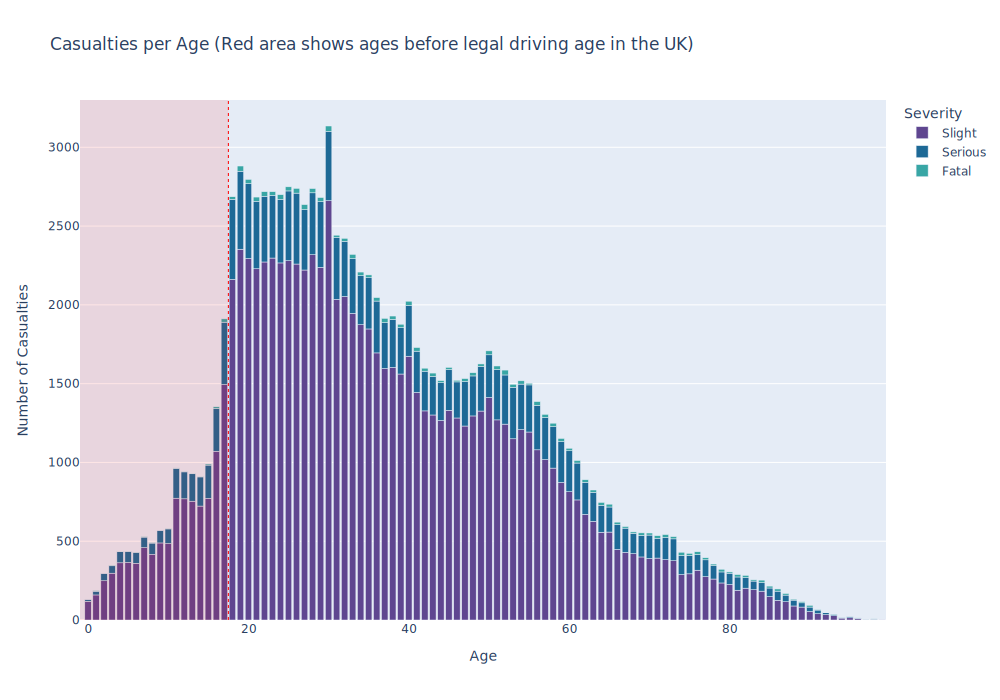

In [37]:
reordered_data = raw_data.copy()
reordered_data['casualty_severity'] = reordered_data['casualty_severity'].cat.reorder_categories(['3', '2', '1'], ordered=True)

age_counts = pd.DataFrame(reordered_data.groupby(['age_of_casualty', 'casualty_severity']).size()).reset_index()
age_counts.drop([0,1,2], axis=0, inplace=True)
age_counts.columns = ['age_of_casualty','casualty_severity','count']
age_counts['casualty_severity'] = age_counts['casualty_severity'].cat.rename_categories({'1' : 'Fatal', '2' : 'Serious', '3' : 'Slight'})

fig = px.bar(age_counts, 
             x='age_of_casualty',
             y='count',
             color='casualty_severity',
             title="Casualties per Age (Red area shows ages before legal driving age in the UK)",
             labels={'age_of_casualty' : 'Age', 'count' : 'Number of Casualties', 'casualty_severity' : 'Severity'},
             color_discrete_sequence=px.colors.qualitative.Prism,
             width=1000, height=700)
fig.add_vline(x=17.5, line_width=1, line_dash="dot", line_color="red")
fig.add_vrect(x0=-1, x1=17.5, line_width=0, fillcolor="red", opacity=0.1)
fig.show()

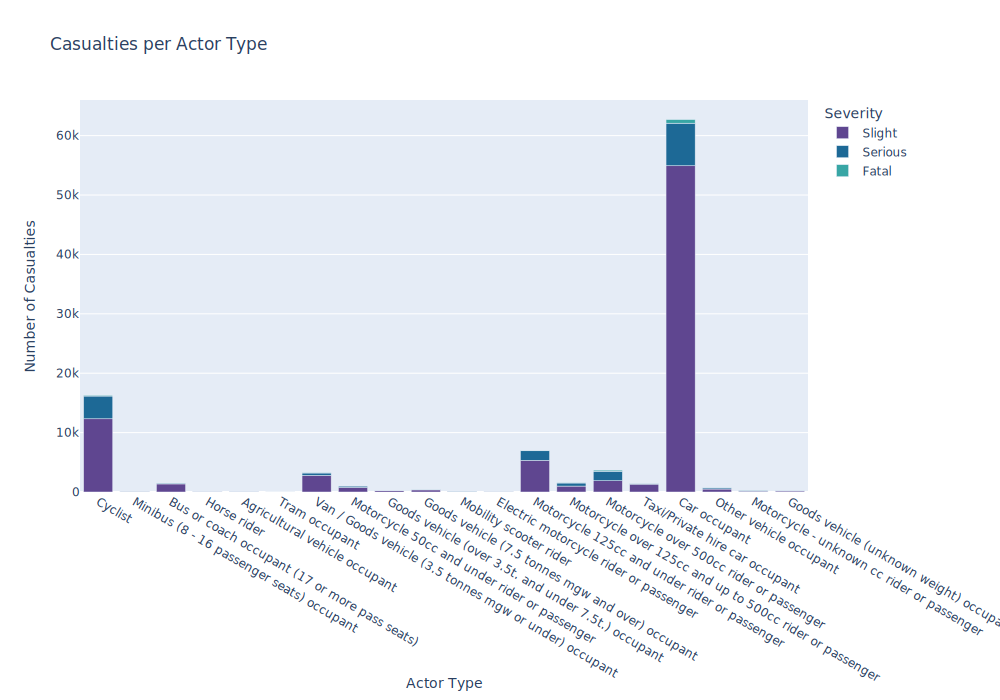

In [39]:
type_counts = pd.DataFrame(reordered_data.groupby(['casualty_type', 'casualty_severity']).size()).reset_index()
type_counts.drop([0,1,2], axis=0, inplace=True)
type_counts.columns = ['casualty_type','casualty_severity','count']
type_counts['casualty_severity'] = type_counts['casualty_severity'].cat.rename_categories({'1' : 'Fatal', '2' : 'Serious', '3' : 'Slight'})
type_counts['casualty_type'] = type_counts['casualty_type'].cat.rename_categories({
    '0' : 'Pedestrian',
    '1' : 'Cyclist',
    '2' : 'Motorcycle 50cc and under rider or passenger',
    '3' : 'Motorcycle 125cc and under rider or passenger',
    '4' : 'Motorcycle over 125cc and up to 500cc rider or  passenger',
    '5' : 'Motorcycle over 500cc rider or passenger',
    '8' : 'Taxi/Private hire car occupant',
    '9' : 'Car occupant',
    '10' : 'Minibus (8 - 16 passenger seats) occupant',
    '11' : 'Bus or coach occupant (17 or more pass seats)',
    '16' : 'Horse rider',
    '17' : 'Agricultural vehicle occupant',
    '18' : 'Tram occupant',
    '19' : 'Van / Goods vehicle (3.5 tonnes mgw or under) occupant',
    '20' : 'Goods vehicle (over 3.5t. and under 7.5t.) occupant',
    '21' : 'Goods vehicle (7.5 tonnes mgw and over) occupant',
    '22' : 'Mobility scooter rider',
    '23' : 'Electric motorcycle rider or passenger',
    '90' : 'Other vehicle occupant',
    '97' : 'Motorcycle - unknown cc rider or passenger',
    '98' : 'Goods vehicle (unknown weight) occupant',
    '99' : 'Unknown vehicle type (self rep only)',
    '103' : 'Motorcycle - Scooter (1979-1998)',
    '104' : 'Motorcycle (1979-1998)',
    '105' : 'Motorcycle - Combination (1979-1998)',
    '106' : 'Motorcycle over 125cc (1999-2004)',
    '108' : 'Taxi (excluding private hire cars) (1979-2004)',
    '109' : 'Car (including private hire cars) (1979-2004)',
    '110' : 'Minibus/Motor caravan (1979-1998)',
    '113' : 'Goods over 3.5 tonnes (1979-1998)',
})

fig = px.bar(type_counts, 
             x='casualty_type',
             y='count',
             color='casualty_severity',
             title="Casualties per Actor Type",
             labels={'casualty_type' : 'Actor Type', 'count' : 'Number of Casualties', 'casualty_severity' : 'Severity'},
             color_discrete_sequence=px.colors.qualitative.Prism,
             width=1000, height=700)

fig.show()